## Lecture 2

In [1]:
import nltk as nltk
import gensim as gs
import spacy as sp
import textblob as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
train = [('I love this sandwich.', 'pos'),
   ('This is an amazing place!', 'pos'),
   ('I feel very good about these beers.', 'pos'),
   ('This is my best work.', 'pos'),
   ("What an awesome view", 'pos'),
   ('I do not like this restaurant', 'neg'),
   ('I am tired of this stuff.', 'neg'),
   ("I can't deal with this", 'neg'),
   ('He is my sworn enemy!', 'neg'),
   ('My boss is horrible.', 'neg')]
test = [
   ('The beer was good.', 'pos'),
   ('I do not enjoy my job', 'neg'),
   ("I ain't feeling dandy today.", 'neg'),
   ("I feel amazing!", 'pos'),
   ('Gary is a friend of mine.', 'pos'),
   ("I can't believe I'm doing this.", 'neg')
]

In [0]:
train_df=pd.DataFrame(train)
test_df=pd.DataFrame(test)

In [0]:
train_df = train_df.rename(columns = {0:"sentence",1:"label"})
test_df = test_df.rename(columns={0:"sentence",1:"label"})

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['label'] = le.fit_transform(train_df["label"])
test_df["label"]=le.fit_transform(test_df["label"])

In [0]:
stuff_to_be_removed=list(stopwords.words("english"))+list(punctuation)

In [0]:
train_df["sentence"]=train_df["sentence"].str.lower()

In [0]:
corpus = train_df["sentence"].tolist()

In [9]:
stemmer=LancasterStemmer()
final_corpus=[]
for x in range(len(corpus)):
    text=word_tokenize(corpus[x].lower())
    text = [stemmer.stem(y) for y in text if y not in stuff_to_be_removed]
    ent = " ".join(text)
    final_corpus.append(ent)
final_corpus

['lov sandwich',
 'amaz plac',
 'feel good beer',
 'best work',
 'awesom view',
 'lik resta',
 'tir stuff',
 "ca n't deal",
 'sworn enemy',
 'boss horr']

In [0]:
new_df=pd.DataFrame(final_corpus)
new_df['label']=train_df['label']
new_df.columns=['sentence','label']

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(new_df["sentence"])

In [12]:
X_train = vector.toarray()
y_train=new_df["label"]
from sklearn.naive_bayes import GaussianNB
ab=GaussianNB()
ab.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
ypred = ab.predict(X_train)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,ypred))
print(confusion_matrix(y_train,ypred))
print(classification_report(y_train,ypred))

1.0
[[5 0]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [14]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Lecture 3


In [15]:
df = pd.read_csv('/content/drive/My Drive/NLP datasets/Consumer_Complaints_big.csv')
df.head()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/17/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,ALLY FINANCIAL INC.,TX,75035,NaN,NaN,Web,07/17/2019,In progress,Yes,NaN,3309495
1,07/17/2019,Credit card or prepaid card,General-purpose prepaid card,Trouble using the card,Problem using the card to withdraw money from ...,NaN,NaN,SQUARE INC,KS,674XX,NaN,NaN,Web,07/17/2019,In progress,Yes,NaN,3310031
2,07/17/2019,Debt collection,Other debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,NaN,"Diversified Consultants, Inc.",FL,NaN,NaN,NaN,Web,07/17/2019,In progress,Yes,NaN,3309687
3,07/17/2019,Mortgage,VA mortgage,Trouble during payment process,NaN,NaN,NaN,"FLAGSTAR BANK, FSB",VA,22554,Servicemember,NaN,Web,07/17/2019,In progress,Yes,NaN,3308925
4,07/17/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company believes it acted appropriately as aut...,BYL Collection Services,TN,370XX,Servicemember,NaN,Web,07/17/2019,Closed with explanation,Yes,NaN,3308914


In [0]:
df1 = df[['Product','Consumer complaint narrative']]

In [17]:
df1['Product'].value_counts()

Mortgage                                                                        282345
Debt collection                                                                 253853
Credit reporting, credit repair services, or other personal consumer reports    252092
Credit reporting                                                                140432
Credit card                                                                      89190
Bank account or service                                                          86206
Student loan                                                                     52889
Credit card or prepaid card                                                      52468
Checking or savings account                                                      45000
Consumer Loan                                                                    31604
Vehicle loan or lease                                                            12408
Money transfer, virtual currency, or money 

In [18]:
df1['Product'] = df1['Product'].str.lower()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df1.isnull().sum()

Product                              0
Consumer complaint narrative    938347
dtype: int64

In [0]:
df1= df1.dropna()

In [0]:
def renaming(x):
   #print(x)
   if x =='credit reporting':
        x = 'credit reporting, credit repair services, or other personal consumer reports'
   elif x == 'credit card':
        x = 'credit card or prepaid card'
   elif x == 'virtual currency':
        x = 'money transfer, virtual currency, or money service'
   elif x == 'prepaid card':
        x = 'credit card or prepaid card'
   elif x == 'money transfers':
        x = 'money transfer, virtual currency, or money service'
   elif x == 'student loan': 
        x='Loans'
   elif x=='consumer loan': 
        x='Loans'
   elif x=='payday loan': 
        x='Loans'
   elif x=='checking or savings account': 
        x='bank account or service'
   elif x=='payday loan, title loan, or personal loan': 
        x='Loans'
   elif x=='vehicle loan or lease': 
        x='Loans'
   return x

In [0]:
df1['Product'] = df1['Product'].apply(renaming)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Product'] = le.fit_transform(df1['Product'])

In [0]:
value_counts = df1['Product'].value_counts()
df1 = df1[~df1['Product'].isin(value_counts[value_counts<10000].index)]

In [0]:
from string import punctuation
from nltk.corpus import stopwords
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
corpus = df1['Consumer complaint narrative'].tolist()
len(corpus)
corpus = corpus[1:10000]

In [0]:
final_corpus = []
for i in range(len(corpus)):
  word = word_tokenize(corpus[i].lower())
  word = [stemmer.stem(y) for y in word if y not in stuff_to_be_removed]
  j = " ".join(word)
  final_corpus.append(j)


In [0]:
product_list=df1['Product'].tolist()
product_list=product_list[1:10000]
newdf = pd.DataFrame(final_corpus)
newdf['label'] = product_list
newdf.columns=['sentence','label']

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(newdf['sentence'])
x_train = vector.toarray()
y_train= newdf['label']

In [29]:
from sklearn.naive_bayes import MultinomialNB
ab = MultinomialNB()
ab.fit(x_train,y_train)
ypred = ab.predict(x_train)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,ypred))
print(confusion_matrix(y_train,ypred))
print(classification_report(y_train,ypred))

0.6338633863386338
[[ 260    0    3  625  113    0]
 [   0   38   64  466   34    0]
 [   0    0  263  805   43    0]
 [   0    3    0 3971   73    1]
 [   3    0    3  833 1551    1]
 [   5    0    0  540   46  255]]
              precision    recall  f1-score   support

           0       0.97      0.26      0.41      1001
           1       0.93      0.06      0.12       602
           2       0.79      0.24      0.36      1111
           3       0.55      0.98      0.70      4048
           4       0.83      0.65      0.73      2391
           6       0.99      0.30      0.46       846

    accuracy                           0.63      9999
   macro avg       0.84      0.42      0.46      9999
weighted avg       0.75      0.63      0.59      9999



## Lecture 4

In [30]:
nltk.download('wordnet')
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
from textblob import TextBlob
p = "It is raining heavily in Mumbai. Rainfall in India is high."
blob = TextBlob(p)
print(blob.sentiment)
print(blob.sentences[0])
print(blob.tags)
for i in blob.noun_phrases:
  print(i)
from textblob import Word
w = Word('Platform')
print(w.pluralize())
w = Word('running')
print(w.lemmatize())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
Sentiment(polarity=-0.020000000000000004, subjectivity=0.52)
It is raining heavily in Mumbai.
[('It', 'PRP'), ('is', 'VBZ'), ('raining', 'VBG'), ('heavily', 'RB'), ('in', 'IN'), ('Mumbai', 'NNP'), ('Rainfall', 'NN'), ('in', 'IN'), ('India', 'NNP'), ('is', 'VBZ'), ('high', 'JJ')]
mumbai
rainfall
india
Platforms
running


In [0]:
spam = pd.read_csv('/content/drive/My Drive/NLP datasets/spam.csv',encoding='ISO8859')
spam.head()
spam = spam.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],1)
corpus = spam['v2'].tolist()
final_corpus = []
for i in range(len(corpus)):
  word = word_tokenize(corpus[i].lower())
  word = [stemmer.stem(y) for y in word if y not in stuff_to_be_removed]
  j = " ".join(word)
  final_corpus.append(j)


In [0]:
newdf=pd.DataFrame(final_corpus)
newdf['v1']=spam['v1']
newdf.columns=['Msg','Sentiment']

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(newdf['Msg'])
x_train = vector.toarray()
y_train= newdf['Sentiment']

In [34]:
from sklearn.naive_bayes import GaussianNB
ab = GaussianNB()
ab.fit(x_train,y_train)
ypred = ab.predict(x_train)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,ypred))
print(confusion_matrix(y_train,ypred))
print(classification_report(y_train,ypred))

0.8955491744436468
[[4243  582]
 [   0  747]]
              precision    recall  f1-score   support

         ham       1.00      0.88      0.94      4825
        spam       0.56      1.00      0.72       747

    accuracy                           0.90      5572
   macro avg       0.78      0.94      0.83      5572
weighted avg       0.94      0.90      0.91      5572



### Lecture 5

In [0]:
june = pd.read_csv('/content/drive/My Drive/NLP datasets/June_2018.csv',encoding='ISO8859')
may = pd.read_csv('/content/drive/My Drive/NLP datasets/May_2018.csv',encoding='ISO8859')
feb = pd.read_csv('/content/drive/My Drive/NLP datasets/Feb_2018.csv',encoding='ISO8859')

In [0]:
june = june[["Message","Sentiment"]]
may = may[["Message","Sentiment"]]
feb = feb[["Message","Sentiment"]]

In [0]:
june.drop_duplicates(subset=["Message"],inplace=True)
june=june.dropna()
may.drop_duplicates(subset=["Message"],inplace=True)
may=may.dropna()
feb.drop_duplicates(subset=["Message"],inplace=True)
feb=feb.dropna()

In [0]:
# june['Sentiment']=le.fit_transform(june['Sentiment'])
# may['Sentiment']=le.fit_transform(may['Sentiment'])
# feb['Sentiment']=le.fit_transform(feb['Sentiment'])

In [61]:
june.shape

(9824, 2)

In [0]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus1=june['Message'].tolist()
corpus2=may['Message'].tolist()
corpus3=feb['Message'].tolist()
def tokenize(s):
  final_corpus=[]
  for x in range(len(s)):
    word = word_tokenize(s[x].lower())
    word = [t for t in word if len(t)>2]
    word = [lemmatizer.lemmatize(y) for y in word if y not in stuff_to_be_removed]
    word = [t for t in word if not any (c.isdigit() for c in t)]
    j=" ".join(word)
    final_corpus.append(j)
  return final_corpus
cleaned1=tokenize(corpus1)
cleaned2=tokenize(corpus2)
cleaned3=tokenize(corpus3)

In [0]:
junenew = pd.DataFrame({'Message':cleaned1})
sentimentlist1=pd.Series(june['Sentiment'].tolist())
junenew['Sentiment']=sentimentlist1
maynew = pd.DataFrame({'Message':cleaned2})
sentimentlist2=pd.Series(may['Sentiment'].tolist())
maynew['Sentiment']=sentimentlist2
febnew = pd.DataFrame({'Message':cleaned3})
sentimentlist3=pd.Series(feb['Sentiment'].tolist())
febnew['Sentiment']=sentimentlist3

In [77]:
data = pd.concat([junenew,maynew,febnew])
data.shape

(31359, 2)

In [78]:
data.head()

,Message,Sentiment
0,price plz,Neutral
1,,Neutral
2,nice,Positive
3,,Neutral
4,mast,Positive


In [0]:
data = data.reset_index(drop=True)

In [80]:
data['Sentiment'].value_counts()

Neutral     23272
Positive     6318
Negative     1769
Name: Sentiment, dtype: int64

In [81]:
le = LabelEncoder()
data['Sentiment'] = le.fit_transform(data['Sentiment'])
data.head()

,Message,Sentiment
0,price plz,1
1,,1
2,nice,2
3,,1
4,mast,2


In [0]:
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(data['Message'])
X= vector.toarray()
y = data['Sentiment']

In [83]:
maynew.shape[0]+junenew.shape[0]

25224

In [85]:
maynew.shape[0]+junenew.shape[0]+febnew.shape[0]

31359

In [0]:
x_train=X[0:25224,:]
y_train=y[0:25224]
x_test=X[25224:,:]
y_test=y[25224:]

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight="balanced")

In [90]:
rfc.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [92]:
ypred = rfc.predict(x_test)
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.8984515077424613
[[ 128  185    6]
 [  27 4241   86]
 [   2  317 1143]]
              precision    recall  f1-score   support

           0       0.82      0.40      0.54       319
           1       0.89      0.97      0.93      4354
           2       0.93      0.78      0.85      1462

    accuracy                           0.90      6135
   macro avg       0.88      0.72      0.77      6135
weighted avg       0.90      0.90      0.89      6135



In [98]:
may = pd.read_csv('/content/drive/My Drive/NLP datasets/May_2018.csv',encoding='ISO8859')

0         21-05-2018
1         21-05-2018
2         21-05-2018
3         21-05-2018
4         28-05-2018
             ...    
103153    25-05-2018
103154    25-05-2018
103155    26-05-2018
103156    26-05-2018
103157    26-05-2018
Name: Date, Length: 103158, dtype: object

In [0]:
## Dispersion Plots

may = may[["Message","Sentiment","Date"]]
may.drop_duplicates(subset=["Message"],inplace=True)
may=may.dropna()
lemmatizer = WordNetLemmatizer()
corpus2=may['Message'].tolist()
def tokenize(s):
  final_corpus=[]
  for x in range(len(s)):
    word = word_tokenize(s[x].lower())
    word = [t for t in word if len(t)>2]
    word = [lemmatizer.lemmatize(y) for y in word if y not in stuff_to_be_removed]
    word = [t for t in word if not any (c.isdigit() for c in t)]
    j=" ".join(word)
    final_corpus.append(j)
  return final_corpus
cleaned2=tokenize(corpus2)
maynew = pd.DataFrame({'Message':cleaned2})
sentimentlist2=pd.Series(may['Sentiment'].tolist())
maynew['Sentiment']=sentimentlist2
maynew['Date'] = may['Date']

In [0]:
dfpos = maynew[maynew['Sentiment']=="Positive"]
dfneg = maynew[maynew['Sentiment']=="Negative"]
dfneu = maynew[maynew['Sentiment']=="Neutral"]

In [0]:
def sort(df):
  df = df.sort_values(by ='Date')
  df = df.drop_duplicates(subset=['Message'])
  df = df.reset_index(drop=True)
  return df
dfpos = sort(dfpos)
dfneg = sort(dfneg)
dfneu = sort(dfneu)
maynew = sort(maynew)
def top_words(df):
  n=15
  a = df['Message'].str.lower().str.cat(sep=' ')
  words = word_tokenize(a)
  word_dist = nltk.FreqDist(words)
  word_data = pd.DataFrame(word_dist.most_common(n),columns=['Word', 'Frequency'])
  return word_data['Word']

positive = top_words(dfpos).values.tolist()
negative = top_words(dfneg).values.tolist()
neutral  = top_words(dfneu).values.tolist()
def form_text(df):
    text = ' '.join(df["Message"])
    return text

postext = form_text(dfpos)
negtext = form_text(dfneg)
neutext = form_text(dfneu)
alltext = form_text(maynew)
def convert_text(text):
    tokens = nltk.word_tokenize(text)
    final_text = nltk.Text(tokens)
    
    return final_text

pos_text = convert_text(postext)
neg_text = convert_text(negtext)
neu_text = convert_text(neutext)
all_text = convert_text(alltext)

In [0]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

def dispersion(text, words):
    points = [(x, y) for x in range(len(text))
          for y in range(len(words)) if text[x] == words[y]]
 
    if points:
        x, y = zip(*points)
    else:
        x = y = ()
 
    plt.plot(x, y, "rx", scalex=.1, color="green")
    plt.yticks(range(len(words)), words, color="black")
    plt.ylim(-1, len(words))
    plt.title("Lexical Dispersion Plot")
    plt.xlabel("Word Offset")
    plt.show()


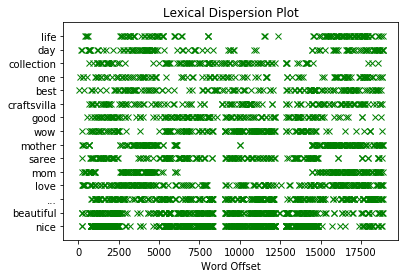

In [111]:
dispersion(pos_text, positive)

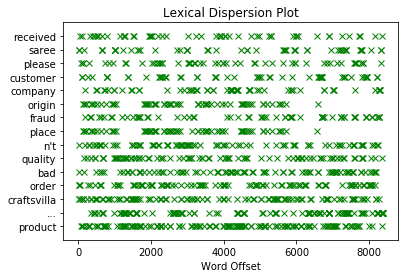

In [112]:
dispersion(neg_text, negative)

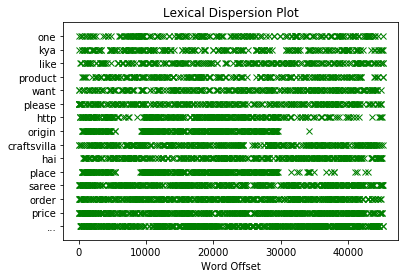

In [113]:
dispersion(neu_text, neutral)

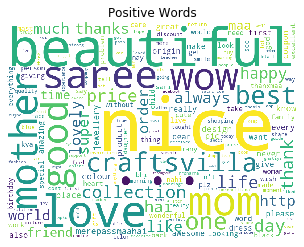

In [114]:
##WordClouds
from collections import Counter
plist=[]
for x in dfpos['Message']:
    word = word_tokenize(x)
    for i in word:
        plist.append(i)
counts=dict(Counter(plist))
from wordcloud import WordCloud
plt.title("Positive Words")
wordcloud = WordCloud(background_color='white',width=800, height=600).generate_from_frequencies(counts) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

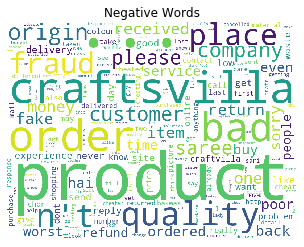

In [116]:
from collections import Counter
nlist=[]
stringp=[]
for x in dfneg['Message']:
    word = word_tokenize(x)
    for i in word:
        nlist.append(i)
counts1=dict(Counter(nlist))
from wordcloud import WordCloud
plt.title("Negative Words")
wordcloud = WordCloud(background_color='white',width=800, height=600).generate_from_frequencies(counts1) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

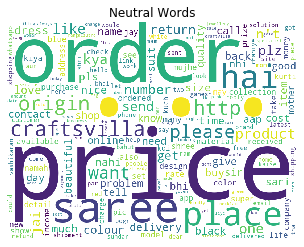

In [117]:
from collections import Counter
nelist=[]
for x in dfneu['Message']:
    word = word_tokenize(x)
    for i in word:
        nelist.append(i)
counts2=dict(Counter(nelist))
from wordcloud import WordCloud
plt.title("Neutral Words")
wordcloud = WordCloud(background_color='white',width=800, height=600).generate_from_frequencies(counts2) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [0]:
##Graph for Sentiments
from textblob import TextBlob
sentiment=[]
for i in may['Message']:
    text1=TextBlob(i)
    pol = text1.sentiment
    sentiment.append(pol)
sent_all = pd.DataFrame(sentiment)
sent_all.head()
dfgraph=pd.concat([may,sent_all],1)

In [125]:
import seaborn as sns
dfgraph = dfgraph.dropna()
dfgraph.head()
dfgraph.shape
dfgraph['Sentiment'].value_counts()

Neutral     1974
Positive     493
Negative     127
Name: Sentiment, dtype: int64

In [0]:
pos = dfgraph[dfgraph.Sentiment=="Positive"]
neg = dfgraph[dfgraph.Sentiment=="Negative"]
neu = dfgraph[dfgraph.Sentiment=="Neutral"]

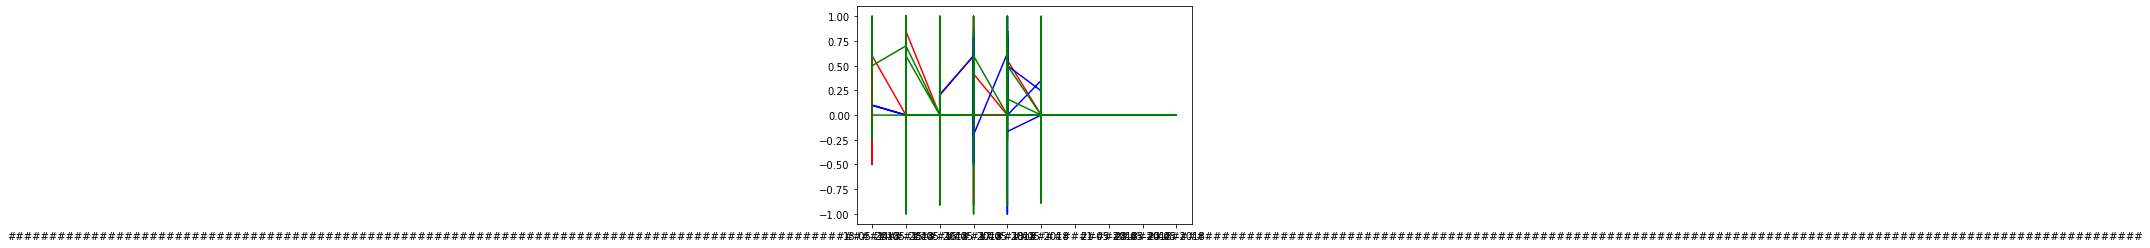

In [132]:
plt.plot(pos['Date'],pos['polarity'],color="red")
plt.plot(neg['Date'],neg['polarity'],color="blue")
plt.plot(neu['Date'],neu['polarity'],color="green")
plt.show()